<a href="https://colab.research.google.com/github/wesley34/comp3414_course_material/blob/master/comp3414_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Useful import

In [7]:
#Q1
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as K
import tensorflow.keras.layers as KL
tfds.disable_progress_bar()


In [8]:
import os
import numpy as np

In [9]:
#Q2
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm

In [10]:
#Q3
import gym
import cv2

#### GPU Usage in colab https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=Y04m-jvKRDsJ

### please do not run it if you are not in colab/ own a gpu

In [11]:
# gpu 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [12]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.104011311000022
GPU (s):
0.10442106400000739
GPU speedup over CPU: 29x


## Homework requirement
---
## Objective
1. Test your skills on basic tuning (50 percent)
2. Test your skills on making a simple deep learning model with gym (50 percent)

## Your goal
1. try to tune your model / change a new one to let your model to classify the hand-written number corretly
2. try to tune your model / change a new one to let your model to classify the CIFAR10 data (https://www.cs.toronto.edu/~kriz/cifar.html) corretly
3. try to call the open-AI gym and create a deep-learning model, you may copy the github one as template or random-online template, and tune/create a new deep-learning model as long as you can finish the work.



---
## Requirement for Q1/Q2
1. send us the capped photo for your model-accuracy in the evaluation section
2. send us the captured photo for your model-architecture
3. send us the code with link/file
4. photo are included inside pdf , code/link is attached inside the pdf/zipped

## Requirement for Q3
1. write down what gym you used
2. send us the capture photo on your model-architecture (code-segment/code-block/photo)
3. send us the model-accuracy (if you attempt the level-2)
4. tell us what the wrapper did (if you attempt the level-3)


---
## Marking
##### Accuracy > model-diffculty

*   Accuracy
*   model-diffculty/creativity (bonus)


---
## Final word
##### Low accuracy is ok , we will see your model and hard work
##### Low accuracy can attain high/full mark as you can demonstrate your hard work



## Q1 tune a tensorflow model

---
## Marks
1. 10 % of the assignment
2. Bonus point will be given (max +5% of assignment3)

## Setting
1. you are give the mnist dataset : hand-written digits https://en.wikipedia.org/wiki/MNIST_database


## Goal
1. Testing your understanding on tensorflow

## tips
1. you can use the following as template



In [ ]:
## Minst dataset download

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


In [ ]:
def normalize_img(image, label):
  # from domain [0-256] compress to codomain [0-1]
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
q2_ds_train

<DatasetV1Adapter shapes: (None, 1, 28, 28), types: tf.float32>

## Model (Main focus on Q1)

In [ ]:
# tune anything you want / or you may change this model to a completely new one
# this is for you as template
model = K.Sequential(name="question_1_model")
model.add(KL.Conv2D(24,(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(KL.Conv2D(64,(1,1),strides=(1,1),padding="valid",activation="relu"))
model.add(KL.MaxPool2D(pool_size=(2,2)))
model.add(KL.BatchNormalization())
model.add(KL.Flatten())
model.add(KL.Dense(64,activation="relu"))
model.add(KL.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=K.optimizers.Adam(lr=0.01),loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [ ]:
print(ds_train)
# x shape (None, 28, 28, 1) where None means batchsize
# y shape (None,) where None means batchsize
# you may input tf dataset adapter as 
# model.fit(x=x,y=y,batch_size=12,epochs=20) == model.fit(<DatasetV1Adapter ,batch_size=12,epochs=20)

<DatasetV1Adapter shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


#### save the best model

In [ ]:
!mkdir training_1

mkdir: cannot create directory ‘training_1’: File exists


In [ ]:
checkpoint_path = "./training_1"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
# cpu version
# callback function for get the best fiting result
model_checkpoint_callback = K.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)


#### fit the model

In [ ]:
# please do not use cross-validation or loss with target to test set
# you can tune this as well
# tips for this one is that the learning rate can be a lot lower
# more batches for a lot lower learning rate
# can remove some bad layers
model.fit(ds_train,batch_size=30,epochs=5,callbacks=[model_checkpoint_callback])

Epoch 1/5
469/469 [==============================] - 54s 115ms/step - loss: 0.0436 - accuracy: 0.9897
Epoch 2/5
 11/469 [..............................] - ETA: 47s - loss: 0.0283 - accuracy: 0.9943

KeyboardInterrupt: ignored

#### summary

In [ ]:
model.summary()

Model: "question_1_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 24)        240       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 64)        1600      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
flatten_6 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                692288    
_________________________________________________________________
dense_13 (Dense)             (None, 10)           

#### plot the model architecture

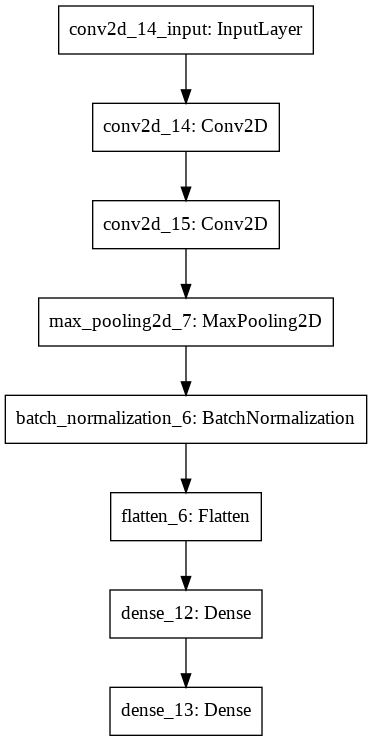

In [ ]:
K.utils.plot_model(model)

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

In [ ]:
latest

'./training_1'

#### Evaluation section  (capture the accuracy for q1)

In [ ]:
model.load_weights(latest)

In [ ]:
# this will be the checking section
model.evaluate(ds_test)

79/79 [==============================] - 2s 29ms/step - loss: 0.1144 - accuracy: 0.9805


[0.11442284286022186, 0.9804999828338623]

# Q2 tune a pytorch model
## Q2 tune a pytorch model

---
## Marks
1. 40 % of the assignment 3
2. bonus (+ 10 percent of assignment 3)

## Setting
1. you are give the CIFAR10 dataset : different picture https://www.cs.toronto.edu/~kriz/cifar.html


## Goal
1. Testing your understanding on pytorch

## tips
1. you can use the following as template



In [13]:
BATCH_SIZE = 6
MINI_BATCH = 500
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Dataset

In [14]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2,drop_last=True) #bad practice here(drop_last=True), but for the ease for some of the student

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2,drop_last=True) #bad practice here , but for the ease

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Data preview

In [15]:
import matplotlib.pyplot as plt
import numpy as np



def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # channel height width -> height width channel
    plt.show()


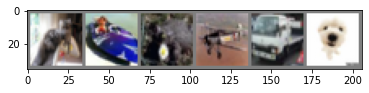

  cat  ship  frog plane truck   dog


In [16]:

data_iter = iter(train_loader)
images, labels = data_iter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[i]] for i in range(BATCH_SIZE)))

## Model (Main focus on Q2)

In [17]:
class Q2Net(nn.Module):
  def __init__(self,data_loader):
    super(Q2Net,self).__init__()

    self.data_loader = data_loader

    self.conv_1 = nn.Sequential(
         nn.Conv2d(3, 32, 5),
         nn.Conv2d(32, 64, 4)
    )
    self.pool_1 = nn.MaxPool2d(2, 2)
    
    self.conv_2 = nn.Sequential(
         nn.Conv2d(64, 128, 3),
         nn.Conv2d(128, 138, 3),
         nn.Conv2d(138,138,1)
    )
    self.pool_2 = nn.MaxPool2d(3, 3)

    self.get_data_size()
    self.check_dim()

    self.fc_1 = nn.Linear(self.flattened_size,128)
    self.fc_2 = nn.Linear(128,64)
    self.fc_3 = nn.Linear(64,10)
  
  def forward(self,x_0):
    x_1 = self.pool_1(F.relu(self.conv_1(x_0)))
    x_2 = self.pool_2(F.relu(self.conv_2(x_1)))
    x_3 = x_2.view(BATCH_SIZE, self.flattened_size)
    x_4 = F.relu(self.fc_1(x_3))
    x_5 = F.relu(self.fc_2(x_4))

    y_hat = self.fc_3(x_5)
    return y_hat
  

  def check_dim(self):
    test_0 = torch.zeros(self.img_size)
    test_1 = self.pool_1(F.relu(self.conv_1(test_0)))
    result  = self.pool_2(F.relu(self.conv_2(test_1)))
    self.flattened_size = int(np.prod(result.size()[1:]))
    return self.flattened_size

  def get_data_size(self,debug=True):
    
    for i in iter(self.data_loader):
      if debug:
        print("Debug On")
        print("batch size: ",i[1].size())
        print("batched image size: ",i[0].size())
        print("label_size: ",i[1].size())
      self.img_size = i[0].size()
      self.label_size = i[1].size()
      break
    return self.img_size, self.label_size 
    


## Model summary

In [18]:
net = Q2Net(train_loader)
print("------------")
print("Summary")
print(net)

Debug On
batch size:  torch.Size([6])
batched image size:  torch.Size([6, 3, 32, 32])
label_size:  torch.Size([6])
------------
Summary
Q2Net(
  (conv_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  )
  (pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): Conv2d(128, 138, kernel_size=(3, 3), stride=(1, 1))
    (2): Conv2d(138, 138, kernel_size=(1, 1), stride=(1, 1))
  )
  (pool_2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (fc_1): Linear(in_features=552, out_features=128, bias=True)
  (fc_2): Linear(in_features=128, out_features=64, bias=True)
  (fc_3): Linear(in_features=64, out_features=10, bias=True)
)


In [19]:
# connect your model to gpu
net.to(device)

Q2Net(
  (conv_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  )
  (pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): Conv2d(128, 138, kernel_size=(3, 3), stride=(1, 1))
    (2): Conv2d(138, 138, kernel_size=(1, 1), stride=(1, 1))
  )
  (pool_2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (fc_1): Linear(in_features=552, out_features=128, bias=True)
  (fc_2): Linear(in_features=128, out_features=64, bias=True)
  (fc_3): Linear(in_features=64, out_features=10, bias=True)
)

### optimizers

In [20]:
import torch.optim as optim

objective_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.004, momentum=0.88)

### Training pharse

In [21]:
current_lowest_loss = 1000000
# try to use gpu / u will be very slow :>
for epoch in range(2):
  training_loss = 0
  for idx, data in enumerate(train_loader,0):
    inputs,labels = data
    # clean parameter gradient
    optimizer.zero_grad()
    # make input/labels to gpu/cpu
    inputs = inputs.to(device)
    labels = labels.to(device)
    # forward pharse
    outputs = net(inputs)
    loss = objective_function(outputs,labels)
    # backward propagate
    loss.backward()
    # update optimizer
    optimizer.step()

    # print out stat
    training_loss += loss.item() # The item() method extracts the loss’s value as a Python float.
    
    
    if idx % MINI_BATCH == MINI_BATCH-1: # print per every 500 mini-batches
       print('[%d, %5d] loss: %.3f' % (epoch + 1, idx + 1, training_loss / MINI_BATCH))
       if training_loss < current_lowest_loss:
         current_lowest_loss = training_loss
         torch.save(net.state_dict(),"Question2-best.dat")
       training_loss = 0.

[1,   500] loss: 2.300
[1,  1000] loss: 2.152
[1,  1500] loss: 2.066
[1,  2000] loss: 1.987
[1,  2500] loss: 1.914
[1,  3000] loss: 1.848
[1,  3500] loss: 1.798
[1,  4000] loss: 1.747
[1,  4500] loss: 1.746
[1,  5000] loss: 1.677
[1,  5500] loss: 1.668
[1,  6000] loss: 1.623
[1,  6500] loss: 1.630
[1,  7000] loss: 1.607
[1,  7500] loss: 1.603
[1,  8000] loss: 1.608
[2,   500] loss: 1.551


KeyboardInterrupt: ignored

#### Evaluation part , (capture for accuracy in q2)

In [23]:
correct = 0
total = 0
net = Q2Net(train_loader)
net.load_state_dict(torch.load("Question2-best.dat"))
net.to(device)
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Debug On
batch size:  torch.Size([6])
batched image size:  torch.Size([6, 3, 32, 32])
label_size:  torch.Size([6])
Accuracy of the network on the 10000 test images: 45 %


### tips


1.   run more epoch , as you see here I just ran 2
2.   tune different layers and add dropout
3.   reduce the nueron numbers if possible
4.   try some object detective architecture
5.   call pretrained network for transfer learning
6.   naive approach then fancy
7.   Good Luck




# Q3 make a simple CNN model for Reinforcement learning  
1. Try to adpot Dueling DQN, nosiy DQN ,Double DQN if possible
2. Else, just try to make a simple CNN to control the bot
3. It is better to modify the wrapper
4. You may save the model and then call env.render() in your machine and record us you final product
5. Enjoy !


---
### Basic Requirement  （50%）


1.   Capture us your model architecture 
2.   Capture us with you model mean/max accuracy in the evaluation part




---
### Goal
1.  Understand RL
2.  Understand why we need a better algorithm for RL

---
### Time estimation for tunning
1.  Tune at most 2 hours
2.  Wait the machine run for at most half days (colab if you have gpu)



OPEN AI GYM will be used https://gym.openai.com/docs/

In [ ]:
## https://gym.openai.com/envs/#atari
## some game here :> 

##  https://gym.openai.com/envs

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
## tips : try to follow the github one
## do not go too fancy

## Gym Description

In [ ]:
GYM_NAME = "PongNoFrameskip-v4" #  Skiing-v0 ... any game you loves but the wrapper maybe error
env = gym.make(GYM_NAME)
print("Action avaliable: ")
env.unwrapped.get_action_meanings()

Action avaliable: 


['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

In [ ]:
env.reset()
obs,reward,done,info = env.step(0)
print("obs shape",obs.shape)
print("reward",reward)
print("done",done)

obs shape (210, 160, 3)
reward 0.0
done False


## Hyper parameter

In [ ]:
GAMMA = 0.8
BATCH_SIZE = 32
REPLAY_SIZE = 10000
REPLAY_START_SIZE = 10000
LEARNING_RATE = 3e-2
SYNC_TARGET_FRAMES = 1000

## Decay factor
EPSILON_DECAY_LAST_FRAME = 10**5
EPSILON_START = 1.0
EPSILON_FINAL = 0.02

## Gym Wrapper

In [ ]:
# resetEnv : we force the agent to press left-key for moving at the start of the game
class ResetEnv(gym.Wrapper):
  def __init__(self,env=None):
    super(ResetEnv,self).__init__(env)
    assert env.unwrapped.get_action_meanings()[1] == "FIRE"
  
  def step(self,action):
    return self.env.step(action)
  
  def reset(self):
    # when agent call reset, it will reach here first
    self.env.reset()
    obs,_,done,_ = self.env.step(1)
    # if it dies after he presses left ... (lol) -> we reset again and press right
    if done:
      self.env.reset()
    obs,_,done,_ = self.env.step(2)
    if done:
      self.env.reset()
    return obs

#ProcessFrame 84: we resize the frame and normalizer it
class ProcessFrame84(gym.ObservationWrapper):
  def __init__(self,env=None):
    super(ProcessFrame84,self).__init__(env)
    self.observation_space = gym.spaces.Box(low=0,high=255,shape=(84,84,1),dtype=np.uint8)
  
  def observation(self,obs):
    return ProcessFrame84.process(obs)
  
  @staticmethod
  def process(frame):
    if frame.size == 250* 160* 3:
      img = np.reshape(frame,[250,160,3]).astype(np.float32)
    elif frame.size == 210* 160* 3:
      img = np.reshape(frame,[210,160,3]).astype(np.float32)
    else:
      assert "Unknown resolution "
    
    # weighting on colors to humans
    img = img[:,:,0] * 0.229 + img[:,:,1]*0.587 + img[:,:,2]*(0.114)
    resized_screen = cv2.resize(img,(84,110),interpolation=cv2.INTER_AREA) # 84 : 110 == 160: 210  around 160: 250, 
                                          # its hard to find any int x such that x*160/250 is a int so we use 84:110
    x_t = resized_screen[18:102,:] #cut the head and tail
    x_t = np.reshape(x_t,[84,84,1])
   
    return x_t.astype(np.uint8)

# MomentumMaker : we stack the photo together to get momentum
class MomentumMaker(gym.ObservationWrapper):
  def __init__(self,env,n_steps,dtype=np.float32):
    super(MomentumMaker,self).__init__(env)
    self.dtype = dtype
    old_space = env.observation_space
    self.observation_space = gym.spaces.Box(old_space.low.repeat(n_steps,axis=0),(old_space.high.repeat(n_steps,axis=0)),dtype=self.dtype)

  def reset(self):
    # call this when game ended
    self.buffer = np.zeros_like(self.observation_space.low,dtype=self.dtype)
    return self.observation(self.env.reset())
  
  def observation(self,observation):
    # call this when game is processing
    # first in first out queue
    self.buffer[:-1] = self.buffer[1:]
    self.buffer[-1] = observation
    return self.buffer


# make the shape [height,width,channel] -> [channel,height,width] as nn.conv2d() requires the first element to be channel
class ImageToTorchTensor(gym.ObservationWrapper):
  def __init__(self,env):
    super(ImageToTorchTensor,self).__init__(env)
    old_shape = self.observation_space.shape
    # define gym spaces box
    self.observation_space = gym.spaces.Box(low=0.0,high=1.0,shape=(old_shape[-1],old_shape[0],old_shape[1]),dtype=np.float32) # height,width,channel -> channel,height,width
    
  def observation(self,observation):
    # call this when call observation
    # the numpy array will become (channel,height,width)
    return np.moveaxis(observation,2,0)

# normalize the picture
class Normalization(gym.ObservationWrapper):
  def observation(self,obs):
    return np.array(obs)/255.0


  


In [ ]:
if True:
  print(env.observation_space.high.shape)
  print(env.observation_space.high.repeat(5,axis=0).shape)

(210, 160, 3)
(1050, 160, 3)


## GYM Creation

In [ ]:
def make_env(env_name=GYM_NAME):
  env = gym.make(env_name)
  # any_other gym wrapper function
  env = ResetEnv(env)
  env = ProcessFrame84(env)
  env = ImageToTorchTensor(env)
  env = MomentumMaker(env,4)
  env = Normalization(env)
  # if no or end
  return env

In [ ]:
env = make_env("PongNoFrameskip-v4")
print(env.observation_space)

Box(4, 84, 84)


## Deep - Learning Model (Your main foucs)

In [ ]:
# Tips: for image things only , if you are doing non-image stuff, please make Linear version
class DQN(nn.Module):
  def __init__(self,input_shape,n_actions): # no batch in template [channel,height,width]
    super(DQN,self).__init__()
    self.img_size = input_shape
    self.conv_1 = nn.Sequential(
        nn.Conv2d(input_shape[0],32,kernel_size=6,stride=3),
        nn.ReLU(),
        nn.Conv2d(32,64,kernel_size=4,stride=2),
        nn.ReLU(), 
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2,2),
       
    )
    print("conv_1")
    self.conv_2 = nn.Sequential(
        nn.Conv2d(64,256,kernel_size=3,stride=2),
        nn.ReLU(),
        nn.Conv2d(256,256,kernel_size=1,stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(256),
        nn.MaxPool2d(2,2)
        
    )
    print("conv_2")
    self.check_dim()
    print("Pass check dim")
    self.fc_1 = nn.Sequential(
        nn.Linear(self.flattened_size,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,n_actions)
    )
  def check_dim(self):
    test_0 = torch.zeros(self.img_size).unsqueeze(0)
    print("Test 0 pass")
    test_1 = self.conv_1(test_0)
    print("Test 1 pass")
    result  = self.conv_2(test_1) # wrong size tmr fix
    print("Check dim result pass")
    self.flattened_size = int(np.prod(result.size()[:]))
    return self.flattened_size
  
  def forward(self,x_0):
    x_1 = self.conv_1(x_0)
    x_2 = self.conv_2(x_1)
    x_3 = x_2.view(-1, self.flattened_size)
    y_hat = self.fc_1(x_3)

    return y_hat


## Expereince Buffer

In [ ]:
import collections
Experience = collections.namedtuple("Experience",field_names=["state","action","reward","done","next_state"])
class ExperienceBuffer:
  # initialize the buffer capacity
  def __init__(self,capacity_of_buffer):
    self.buffer = collections.deque(maxlen=capacity_of_buffer)
  # return beffer size
  def __len__(self):
    return len(self.buffer)
  # append exp to buffer
  def append(self,expereince):
    self.buffer.append(expereince)
  # get the random sample from random choice of vector 
  def sample(self,batch_size):
    indices = np.random.choice(len(self.buffer),batch_size,replace=False)
    states,actions,rewards,dones,next_states = zip(*[self.buffer[index] for index in indices]) # zip(*) ==> [[status],[actions],[rewards],[dones],[next_states]]
    return np.array(states),np.array(actions),np.array(rewards,dtype=np.float32),np.array(dones,dtype=np.uint8),np.array(next_states)


## Agent

In [ ]:
class Agent:
  def __init__(self,env,exp_buffer):
    self.env = env
    self.exp_buffer = exp_buffer
    self._reset()
  def _reset(self):
    self.state = env.reset()
    self.total_reward = 0.0
  def play_step(self,net,epsilon=0.0,device="cpu"):
    done_reward = None
    # randomly walk if the probability() base of Uniform distribution < epsilon
    if np.random.random() < epsilon:
      action = env.action_space.sample()
    else:
      # state action
      state_a = np.array([self.state],copy=False)
      # state vector from state action
      state_v = torch.tensor(state_a).to(device)
      # get q_value base on neural network
      q_vals_v = net(state_v)
      _,act_v = torch.max(q_vals_v,dim=1) #action_value base on the largest q_val , where q_val = [a,b,c] , and q_val representing the 3 action scroes
      action = int(act_v.item()) # act_v.item() can access the number of the act_v

    new_state,reward,is_done,_ = self.env.step(action) # move that action
    self.total_reward += reward
      
    # get exp from exp tuple
    exp = Experience(self.state,action,reward,is_done,new_state)
    # store exp in buffer
    self.exp_buffer.append(exp)
    # update self.state
    self.state = new_state
    # check game end
    if is_done:
      done_reward = self.total_reward
      self._reset()
    return done_reward





## Loss function

In [ ]:
def get_loss(batch,net,target_network,device="cpu"):
  states,actions,rewards,is_dones,next_states = batch
  states_v = torch.tensor(states).to(device)
  actions_v = torch.tensor(actions).to(device)
  rewards_v = torch.tensor(rewards).to(device)
  is_dones_v = torch.ByteTensor(is_dones).to(device)
  next_states_v = torch.tensor(next_states).to(device)
  
  # current network 
  batch_action_table_output = net(states_v) # 2D array [batch_size,action_size] batch size * action size
  batch_best_action = batch_action_table_output.gather(1,actions_v.unsqueeze(-1)) # if action take is [1,2,0] for batch [1,2,3] ,then we get the value of
                                  #batch_action_table_output[1][1],batch_action_table_output[2][2],batch_action_table_output[3][0]
                                  # check out the function of unsqueeze yourself
  batch_best_action_expanded = batch_best_action.squeeze(-1) # we need to add 1 more dimension on the array 
  current_state_action_value = batch_best_action_expanded
  
  # target netwokr
  # same theory as above but maximize is enough
  next_state_batch_action_table_output = target_net(next_states_v)
  next_state_values = next_state_batch_action_table_output.max(1)[0] # [0] is used as next_state_batch_action_table_output = [[1,2,3,4]]

  # next_state_values = 0 if it is end already, we will not get any future value after it is die
  next_state_values[is_dones_v] = 0.0

  # we do not train target_net work so we need to detach it from the graph 
  next_state_values = next_state_values.detach()

  # next_best_score * Gamma + current_transitional_reward
  expected_state_action_value = next_state_values * GAMMA + rewards_v

  loss_value = nn.MSELoss()(current_state_action_value,expected_state_action_value)
  return loss_value

## Setup pharse

In [ ]:
net = DQN(input_shape=env.observation_space.shape,n_actions=env.action_space.n).to(device)
target_net = DQN(input_shape=env.observation_space.shape,n_actions=env.action_space.n).to(device)

conv_1
conv_2
Test 0 pass
Test 1 pass
Check dim result pass
Pass check dim
conv_1
conv_2
Test 0 pass
Test 1 pass
Check dim result pass
Pass check dim


## print your model

In [ ]:
print(net)

DQN(
  (conv_1): Sequential(
    (0): Conv2d(4, 32, kernel_size=(6, 6), stride=(3, 3))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_2): Sequential(
    (0): Conv2d(64, 256, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_1): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=6, bias=True)
  )
)


## Training pharse
## Important : change your target reward, 
### the higher the better, but longer

In [ ]:
optimizer = optim.Adam(net.parameters(),lr=LEARNING_RATE)
total_rewards = []
exp_buffer = ExperienceBuffer(REPLAY_SIZE)
agent = Agent(env,exp_buffer)
epsilon = EPSILON_START

In [ ]:
# frame counter
frame_index = 0
# change this plz
target_reward = 21 
best_mean_reward = None
while True:
  frame_index += 1
  epsilon = max(EPSILON_FINAL,EPSILON_START-frame_index/EPSILON_DECAY_LAST_FRAME)
  reward = agent.play_step(net,epsilon,device)
  if reward is not None:
    total_rewards.append(reward)
    # last 100 rewards
    mean_reward = np.mean(total_rewards[-100:])
    print("%d: done %d games, mean reward: %.3f epsilon: %.3f"%(frame_index,len(total_rewards),mean_reward,epsilon))

    if best_mean_reward is None or best_mean_reward < mean_reward:
      torch.save(net.state_dict(),GYM_NAME+"-best.dat")
      if best_mean_reward is not None:
        print("BEST mean reward updated %.3f -> %.3f,model saved"%(best_mean_reward,mean_reward))
      if mean_reward > target_reward:
        print("Solved in %d frame for %d step problem"%(frame_index,target_reward))
        break

  if len(exp_buffer) < REPLAY_START_SIZE:
    continue
  if frame_index % SYNC_TARGET_FRAMES == 0:
    target_net.load_state_dict(net.state_dict())
  
  optimizer.zero_grad()
  batch = exp_buffer.sample(BATCH_SIZE)
  loss = get_loss(batch,net,target_net,device)
  loss.backward()
  optimizer.step()


4202: done 1 games, mean reward: -20.000 epsilon: 0.958
7923: done 2 games, mean reward: -20.000 epsilon: 0.921


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:20.)


11558: done 3 games, mean reward: -20.000 epsilon: 0.884
15076: done 4 games, mean reward: -20.250 epsilon: 0.849
18370: done 5 games, mean reward: -20.400 epsilon: 0.816
21959: done 6 games, mean reward: -20.333 epsilon: 0.780
25749: done 7 games, mean reward: -20.143 epsilon: 0.743
28990: done 8 games, mean reward: -20.250 epsilon: 0.710
32980: done 9 games, mean reward: -20.111 epsilon: 0.670
36258: done 10 games, mean reward: -20.200 epsilon: 0.637
39500: done 11 games, mean reward: -20.273 epsilon: 0.605
43096: done 12 games, mean reward: -20.250 epsilon: 0.569
46870: done 13 games, mean reward: -20.308 epsilon: 0.531
50276: done 14 games, mean reward: -20.357 epsilon: 0.497
53570: done 15 games, mean reward: -20.400 epsilon: 0.464
57088: done 16 games, mean reward: -20.438 epsilon: 0.429
61898: done 17 games, mean reward: -20.353 epsilon: 0.381
65656: done 18 games, mean reward: -20.389 epsilon: 0.343
68710: done 19 games, mean reward: -20.421 epsilon: 0.313
72004: done 20 games,

## Evaluation section (capture this)

In [ ]:
## print your score gained

In [ ]:
## reload , if you have the weighting file saved
env = make_env("PongNoFrameskip-v4")
net = DQN(input_shape=env.observation_space.shape,n_actions=env.action_space.n).to(device)
net.load_state_dict(torch.load(GYM_NAME+"-best.dat"))

In [ ]:
state = env.reset()
total_reward = 0.0
counter = 0
while True:
  # env.render colab cannot
  counter+=1
  state_vector = torch.tensor(np.array([state],copy=False))
  state_vector = state_vector.to(device)
  q_values = net(state_vector).cpu().data.numpy()[0] # tensor.data.numpy() : tensor -> numpy_array, we use [0] as numpy_array == [q_values]
  action = np.argmax(q_values)
  state,reward,done,_ = env.step(action)
  total_reward += reward
  if done:
    break
 
print("Total reward {}".format(total_reward))
  